In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("AirQualityUCI_ready.csv",parse_dates=["Date_Time"],index_col=["Date_Time"])

In [4]:
data.head()

CO_true  CO_sensor  NMHC_true  C6H6_true  NMHC_sensor  \
Date_Time                                                                    
2004-10-03 18:00:00      2.6     1360.0      150.0       11.9       1046.0   
2004-10-03 19:00:00      2.0     1292.0      112.0        9.4        955.0   
2004-10-03 20:00:00      2.2     1402.0       88.0        9.0        939.0   
2004-10-03 21:00:00      2.2     1376.0       80.0        9.2        948.0   
2004-10-03 22:00:00      1.6     1272.0       51.0        6.5        836.0   

                     NOX_true  NOX_sensor  NO2_true  NO2_sensor  O3_sensor  \
Date_Time                                                                    
2004-10-03 18:00:00     166.0      1056.0     113.0      1692.0     1268.0   
2004-10-03 19:00:00     103.0      1174.0      92.0      1559.0      972.0   
2004-10-03 20:00:00     131.0      1140.0     114.0      1555.0     1074.0   
2004-10-03 21:00:00     172.0      1092.0     122.0      1584.0     1203.0   
2004-10-03 22:00:00     131.0      1205.0     116.0      1490.0     1110.0   

                        T    RH      AH  
Date_Time                                
2004-10-03 18:00:00  13.6  48.9  0.7578  
2004-10-03 19:00:00  13.3  47.7  0.7255  
2004-10-03 20:00:00  11.9  54.0  0.7502  
2004-10-03 21:00:00  11.0  60.0  0.7867  
2004-10-03 22:00:00  11.2  59.6  0.7888

In [5]:
y_label={
    "T":"Temperature",
    "RH":"Relative Humidity",
    "AH":"Adjusted Humidity"
}

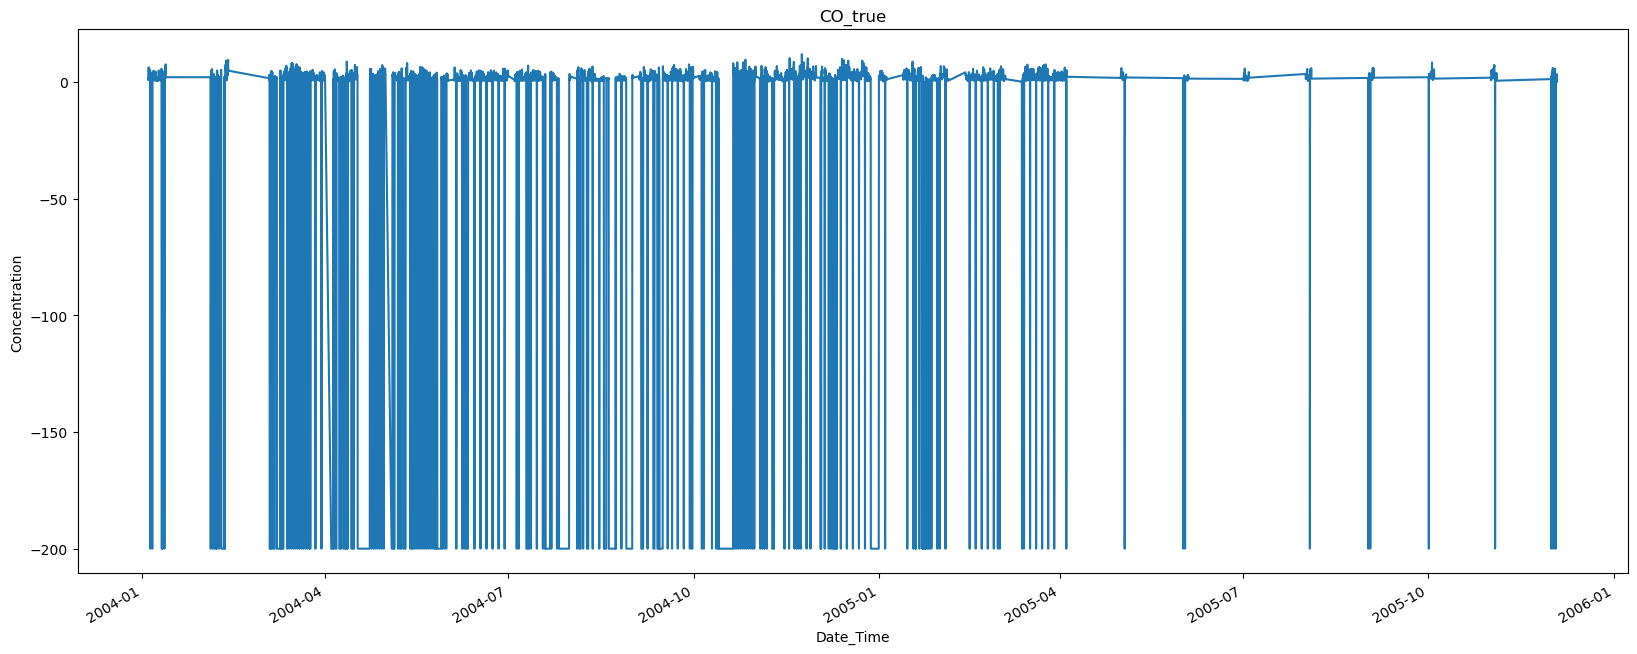

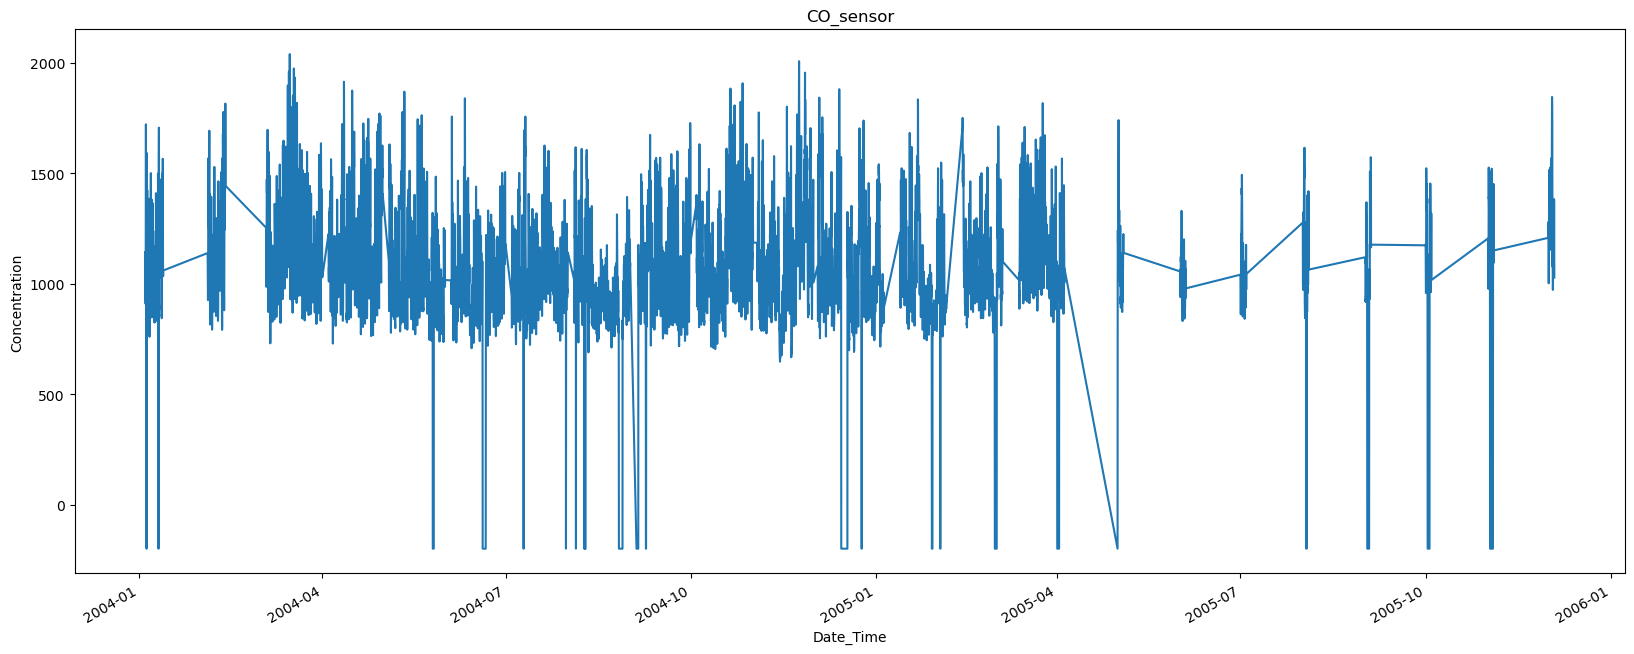

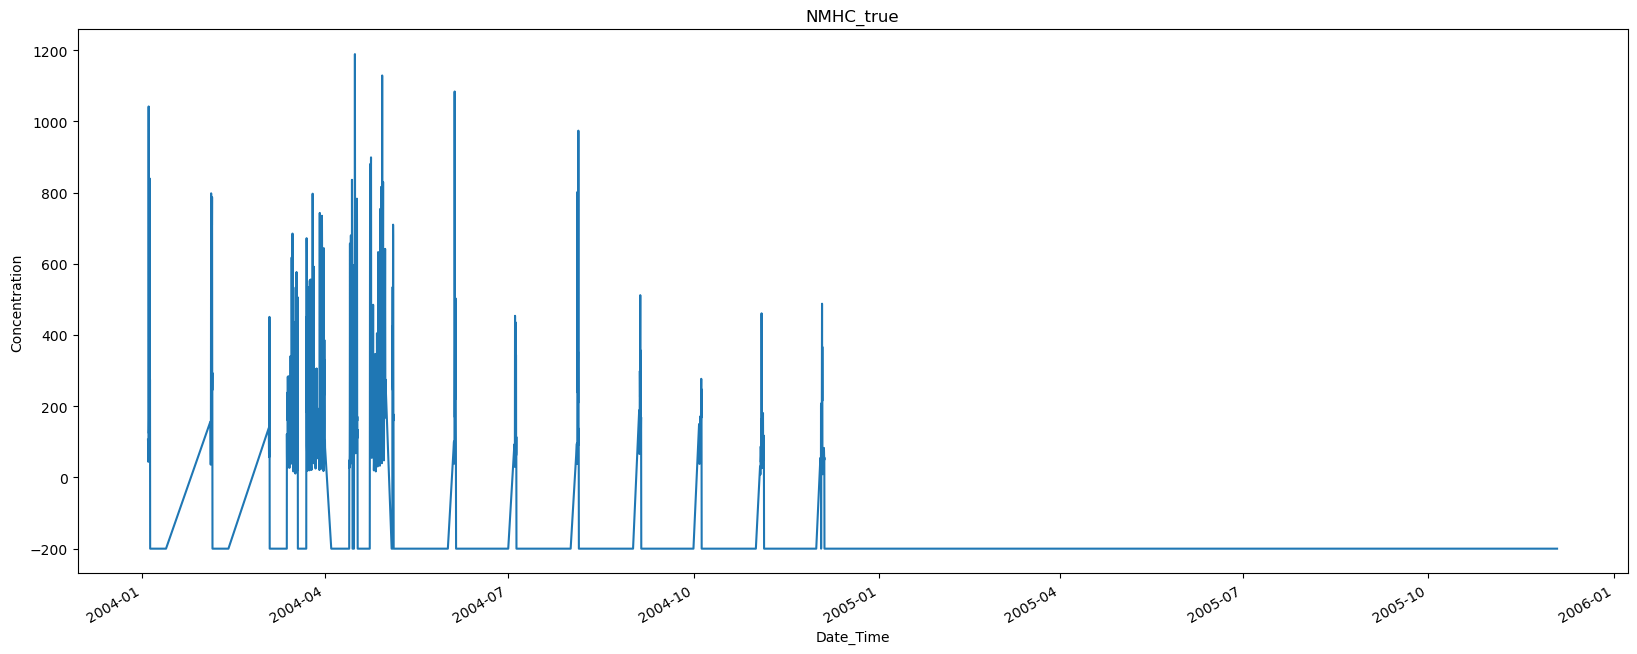

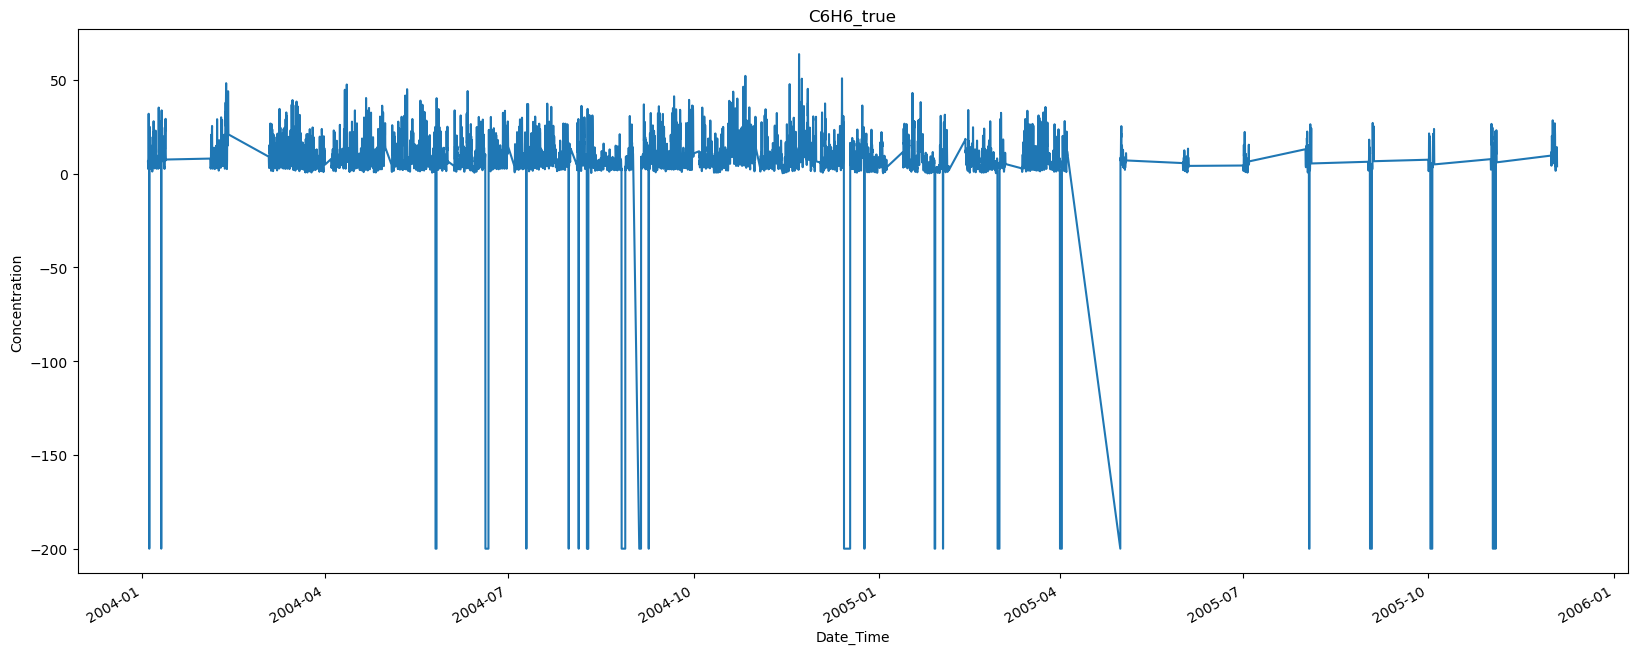

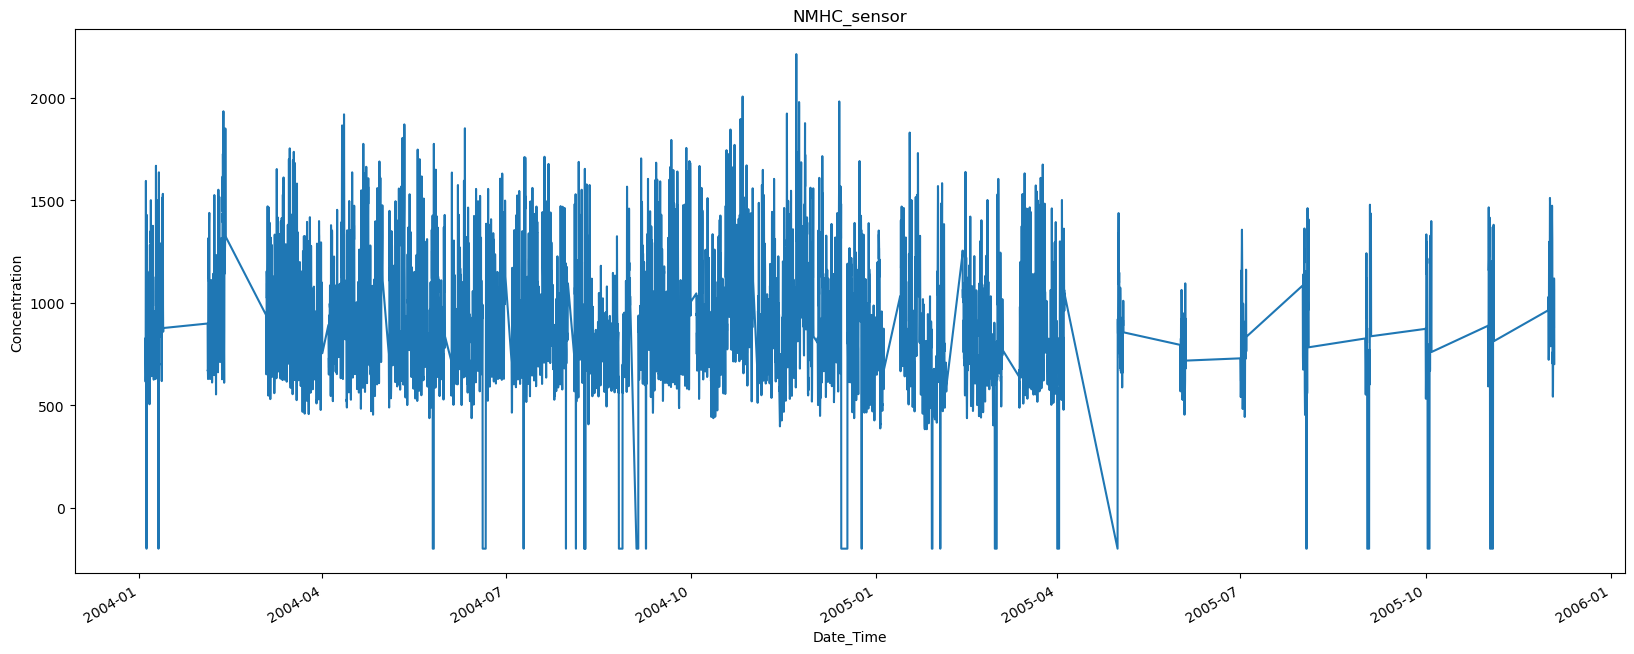

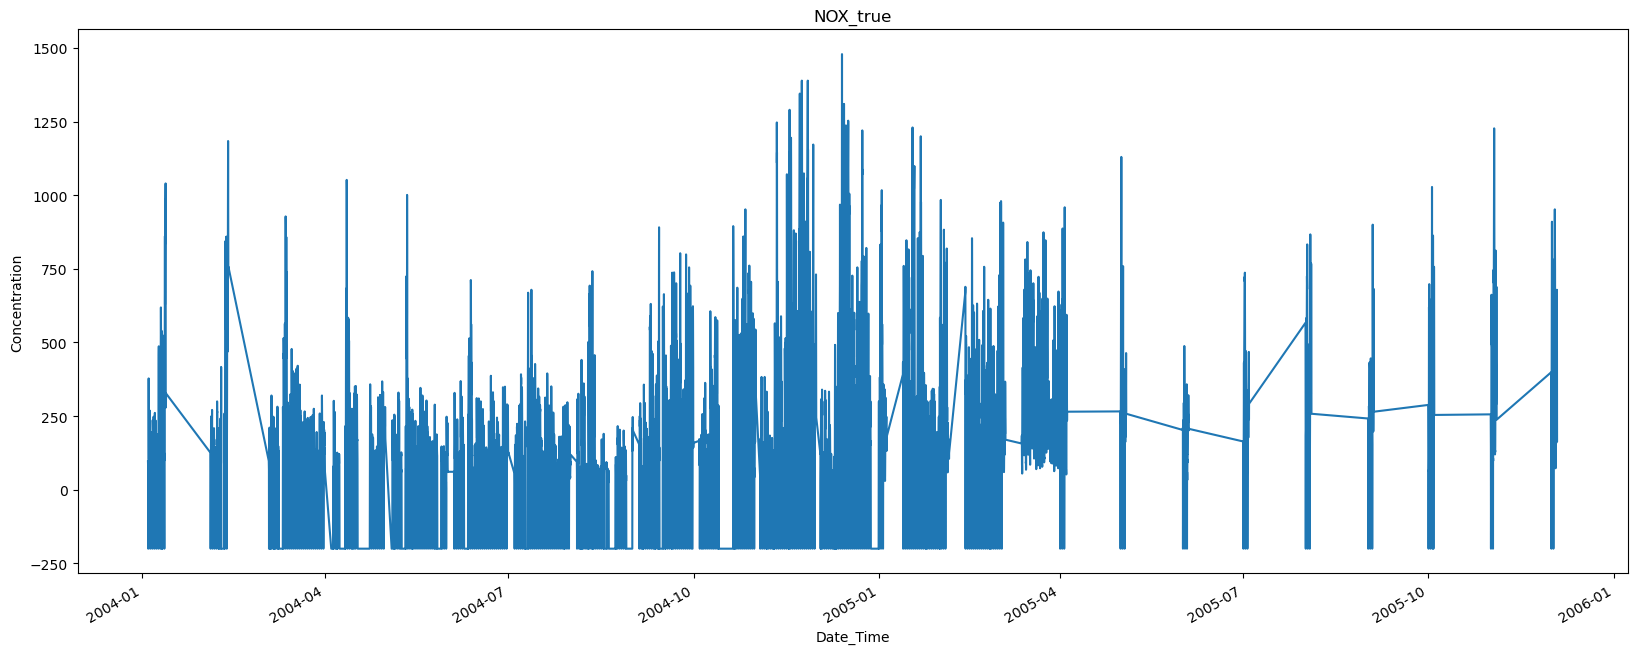

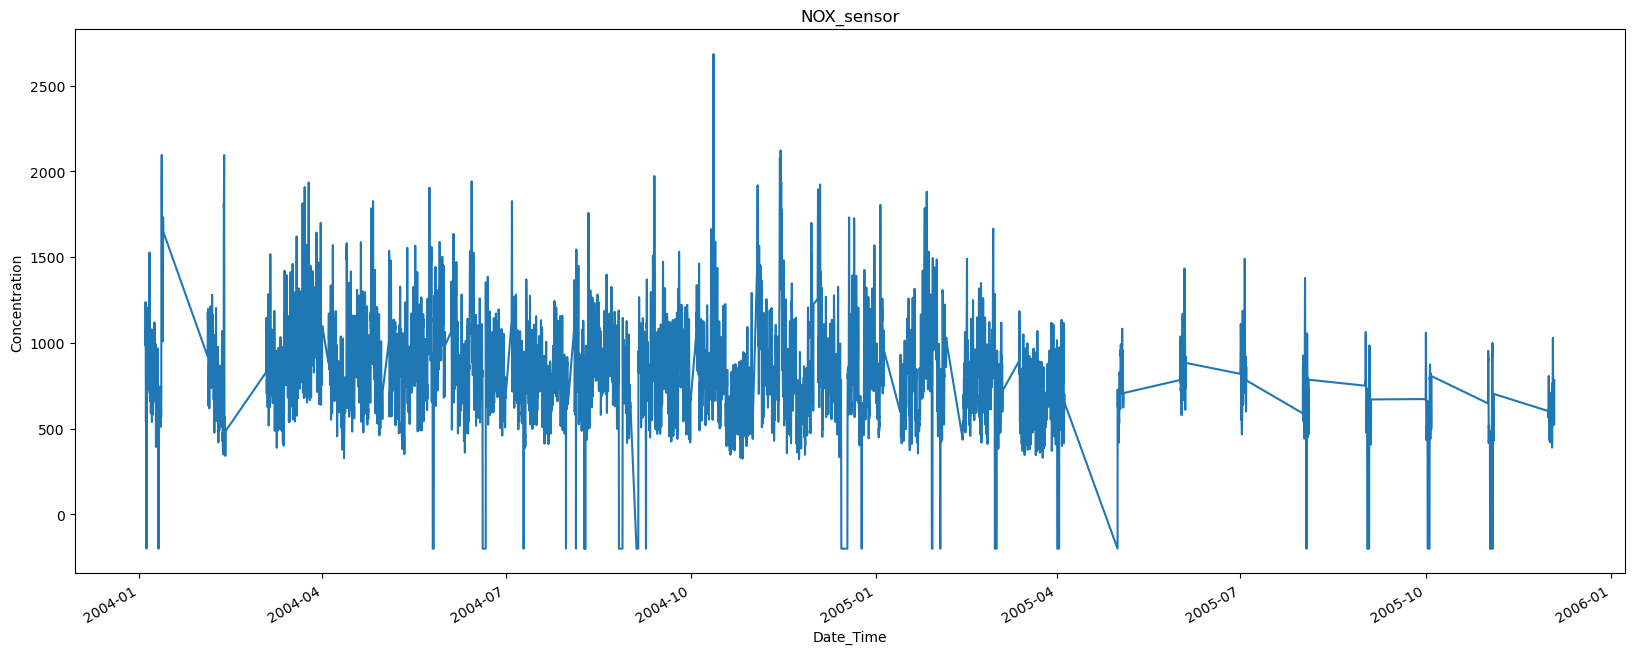

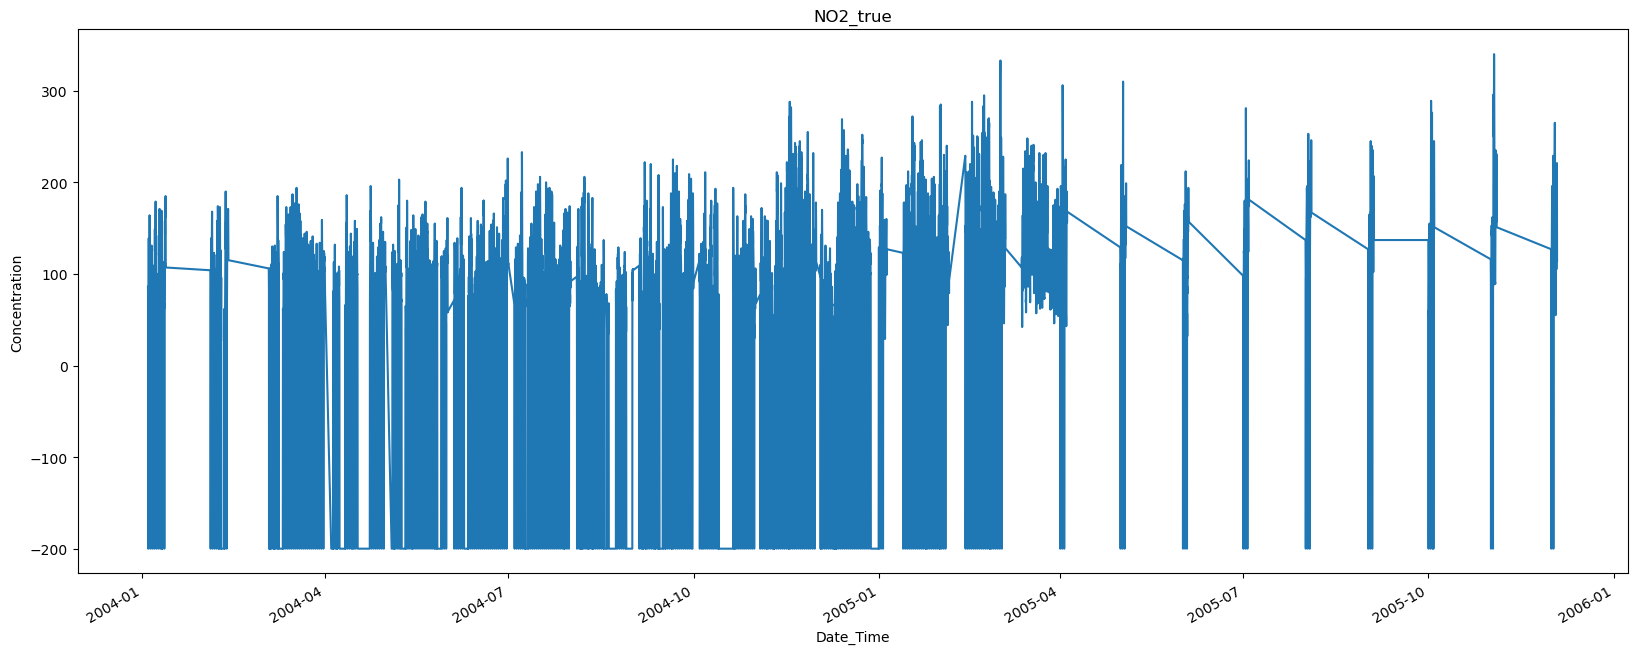

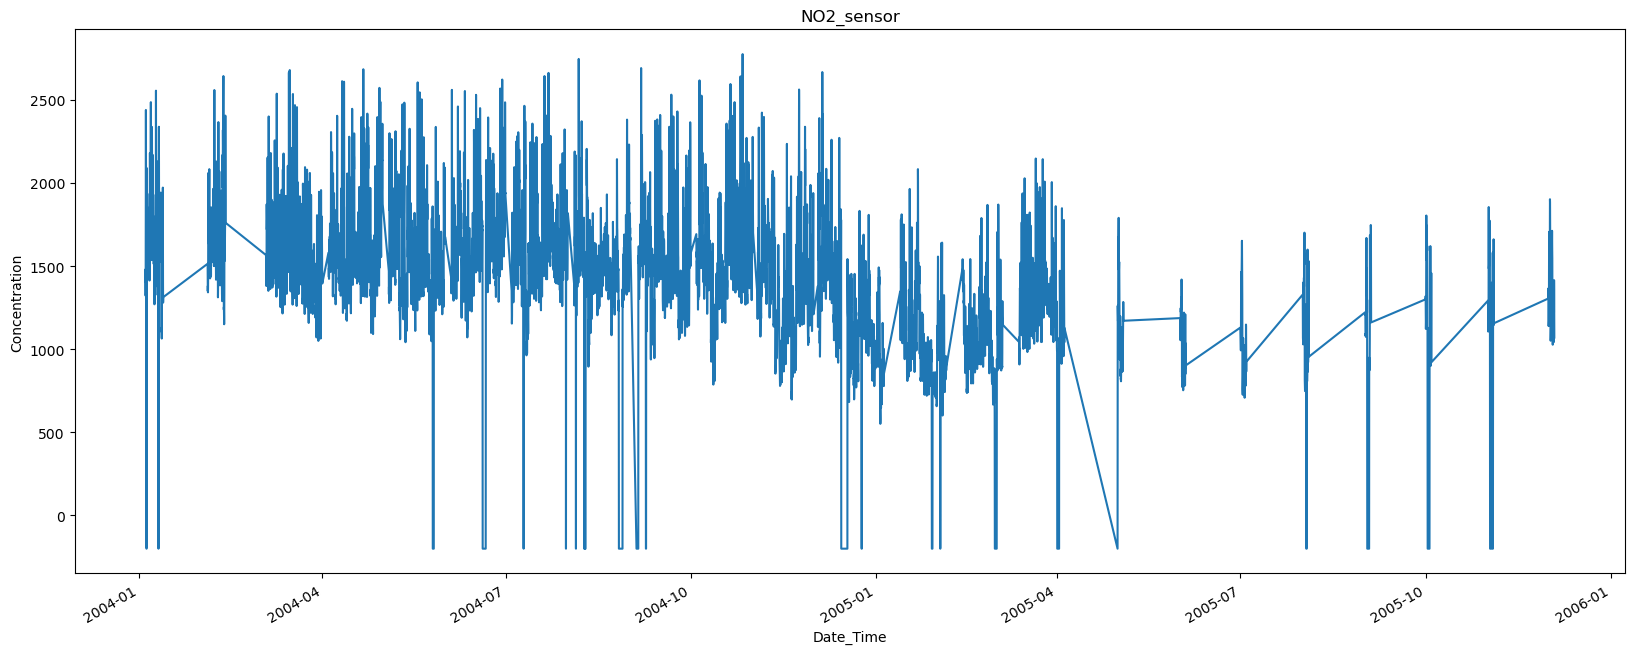

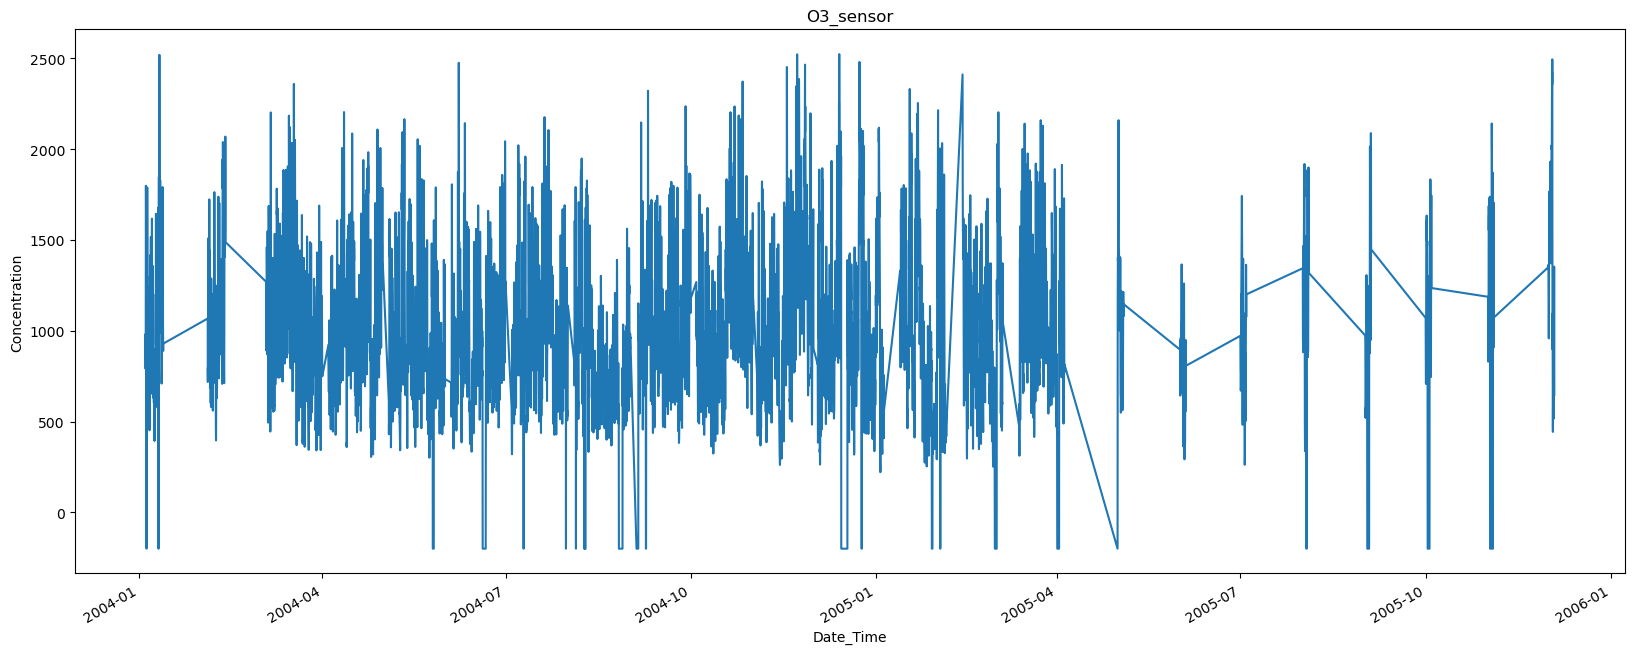

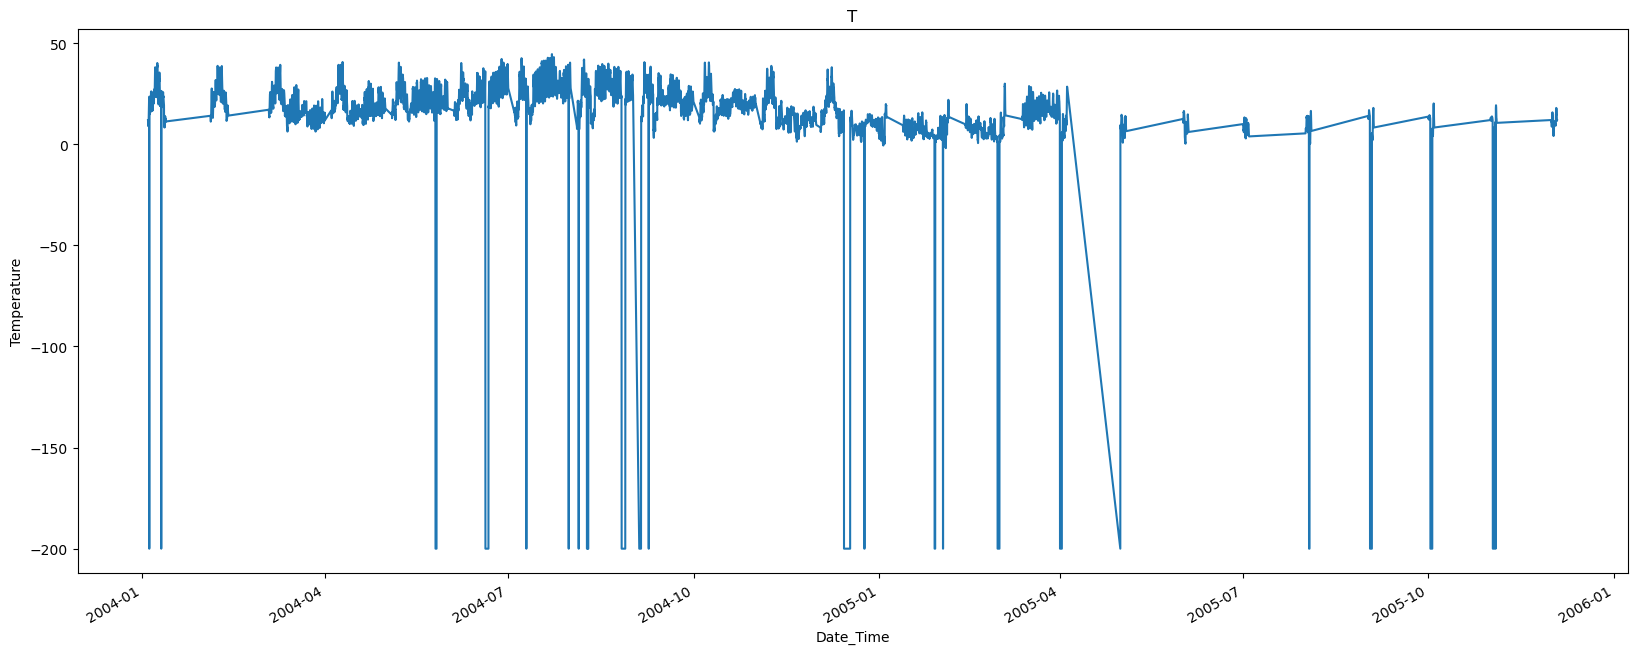

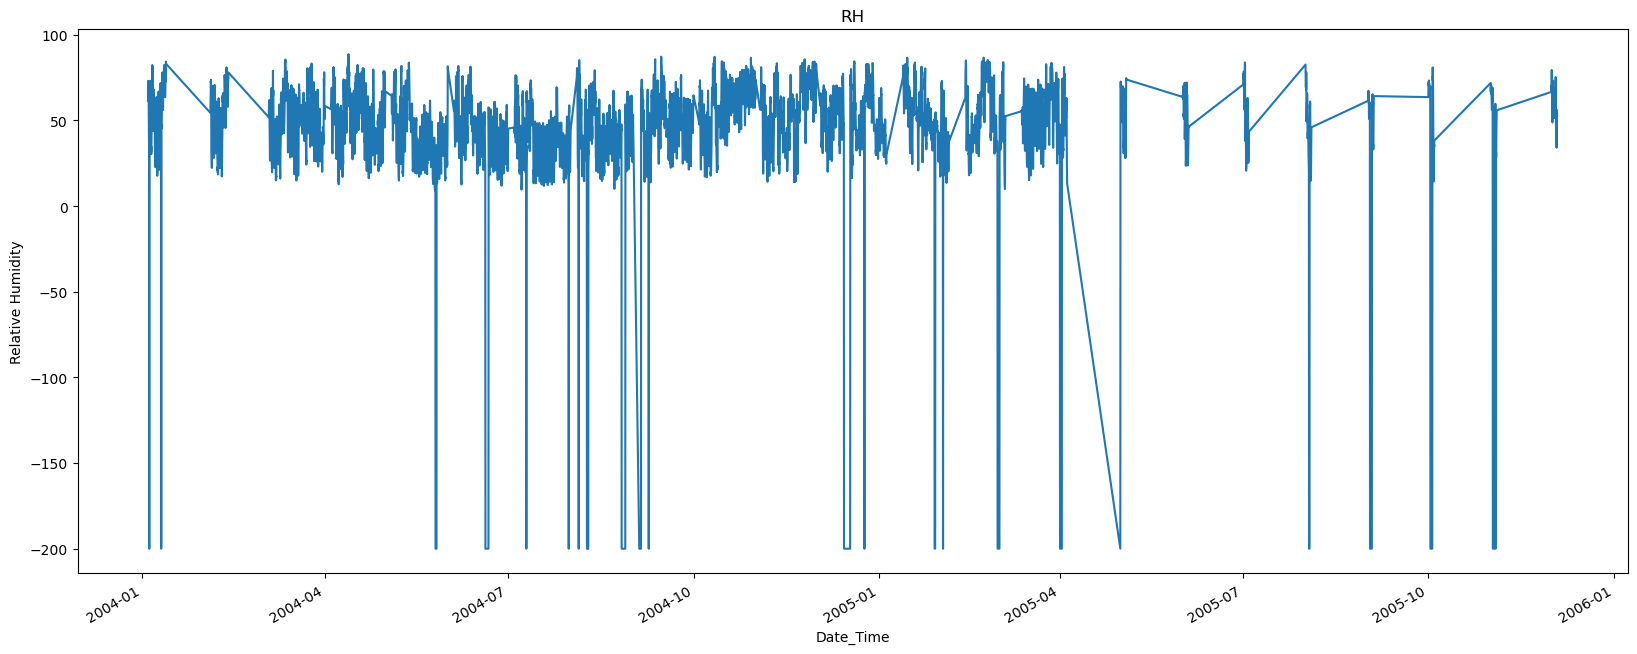

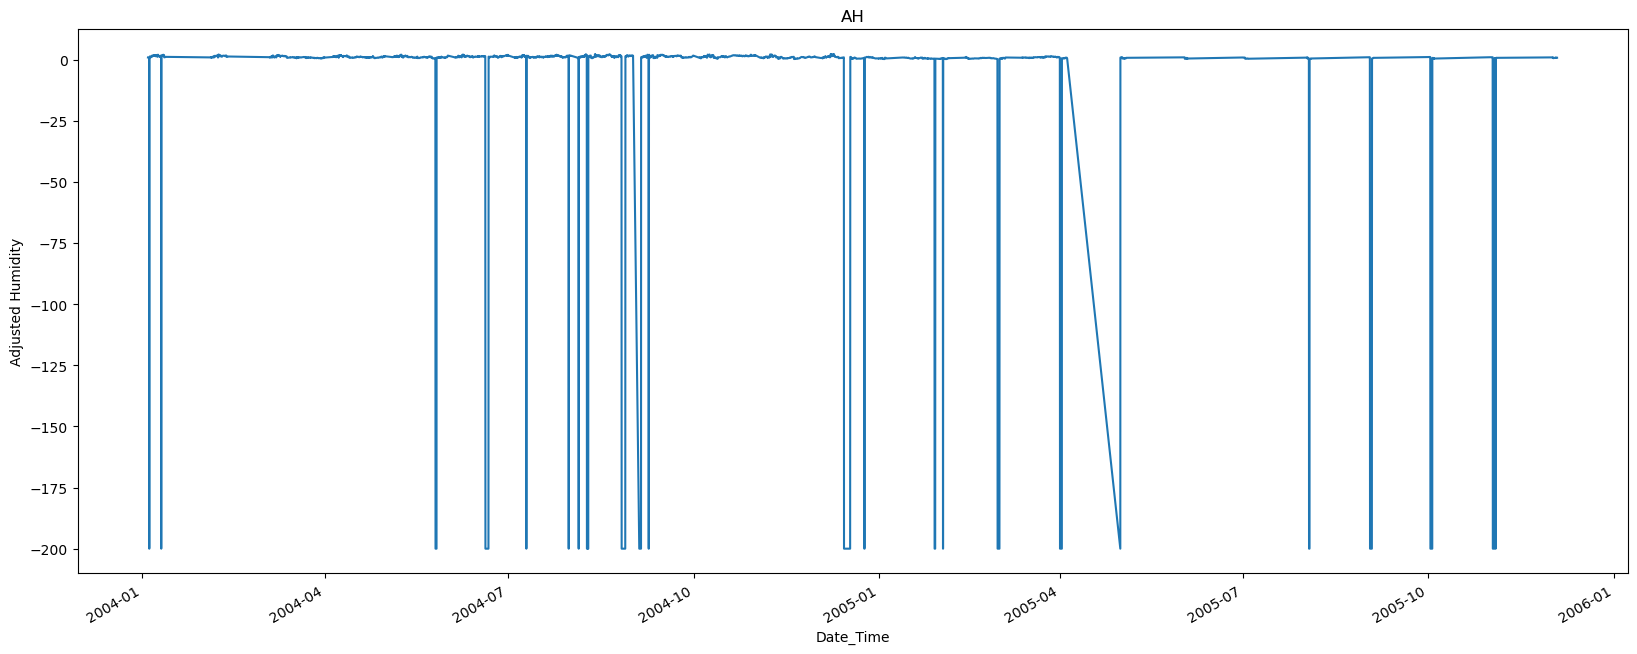

In [11]:
for var in data.columns:
    data[var].plot(figsize=(20,8))
    plt.title(var)
    ylabel=y_label.get(var)
    if ylabel:
        plt.ylabel(ylabel)
    else:
        plt.ylabel("Concentration")
    plt.show()

We will take the best quality data ie from 3/2004 to 4/2004
We will remove negative value to remove outliers.
we will resample the time stamp of each row to one hour

In [12]:
data = data["2004-04-01":"2005-04-30"]# reducing data

C:\Users\asus\AppData\Local\Temp\ipykernel_9164\1301644364.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data = data["2004-04-01":"2005-04-30"]# reducing data


In [13]:
data=data.asfreq("1H")

In [14]:
drop_vars = [var for var in data.columns if "_true" in var]
drop_vars.append("AH")
data.drop(labels=drop_vars,axis=1,inplace=True)

In [16]:
data[data<0]=np.NaN #changine  negative values with nan

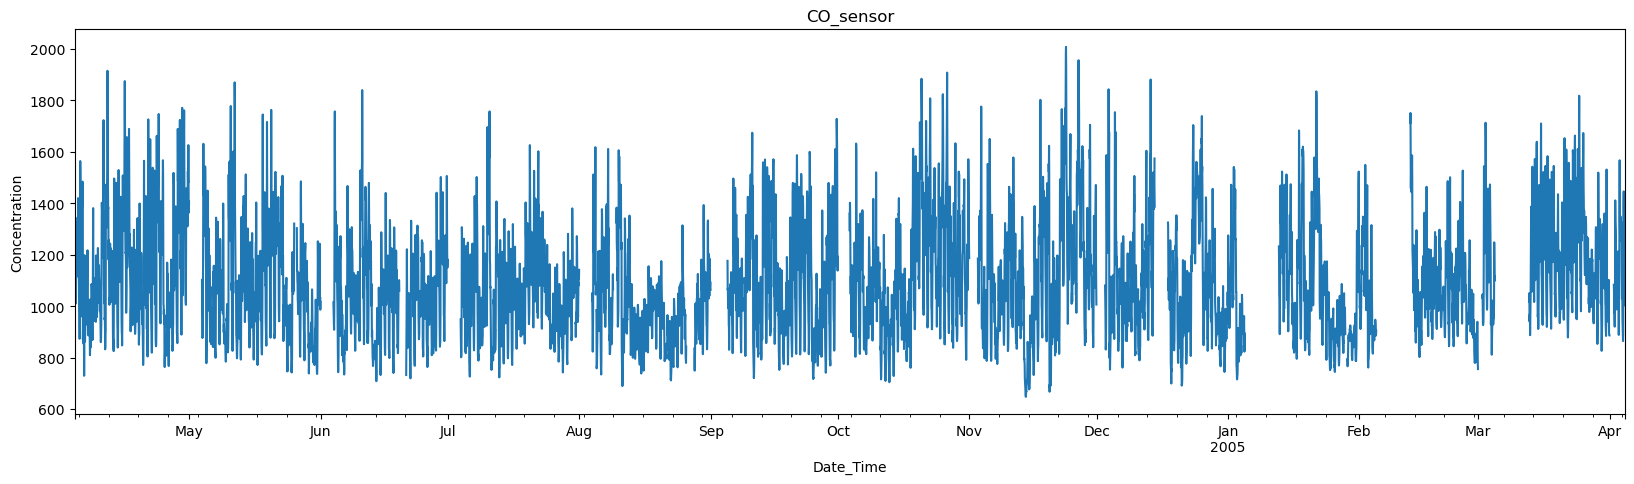

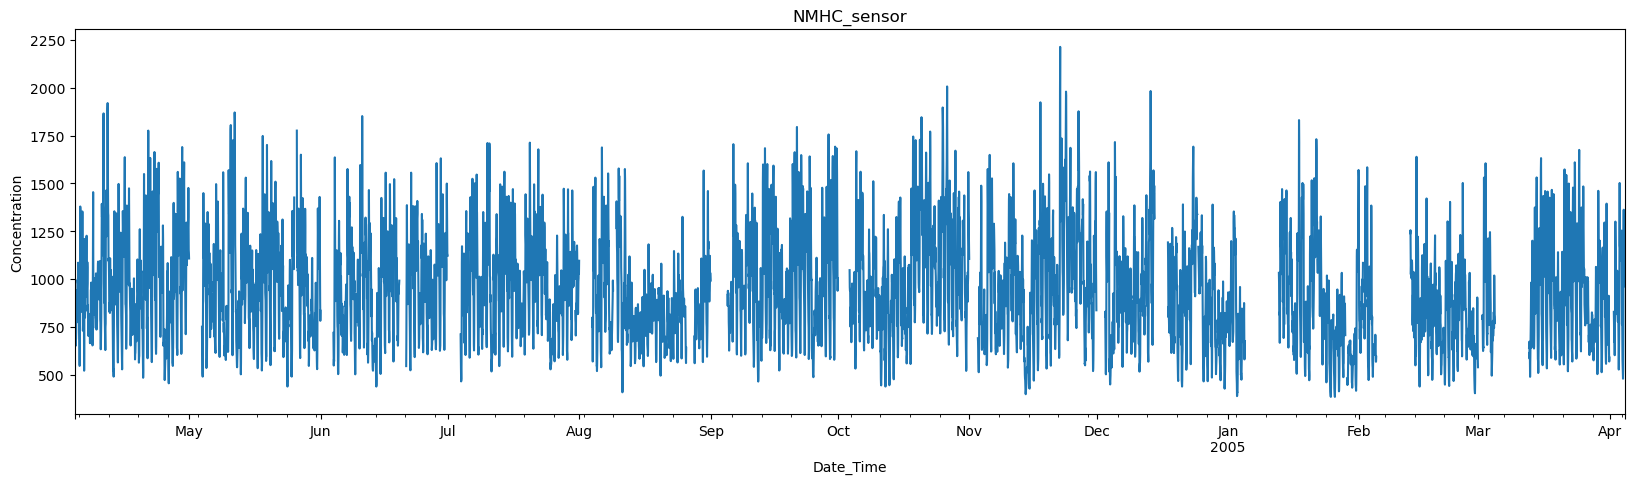

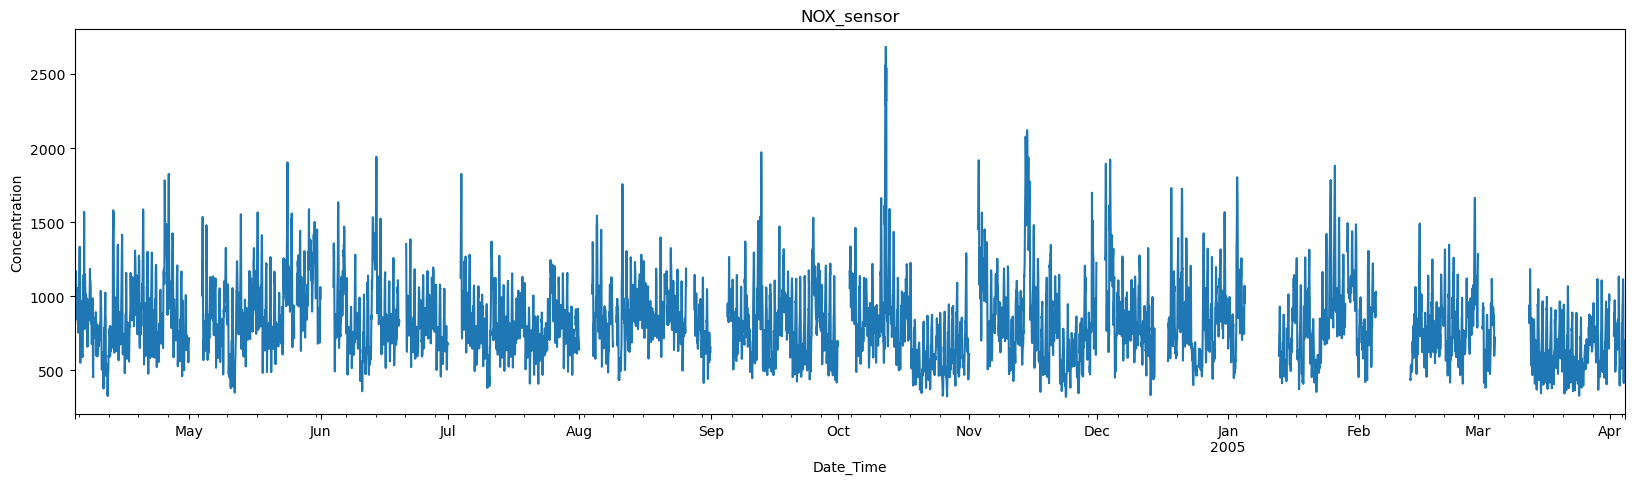

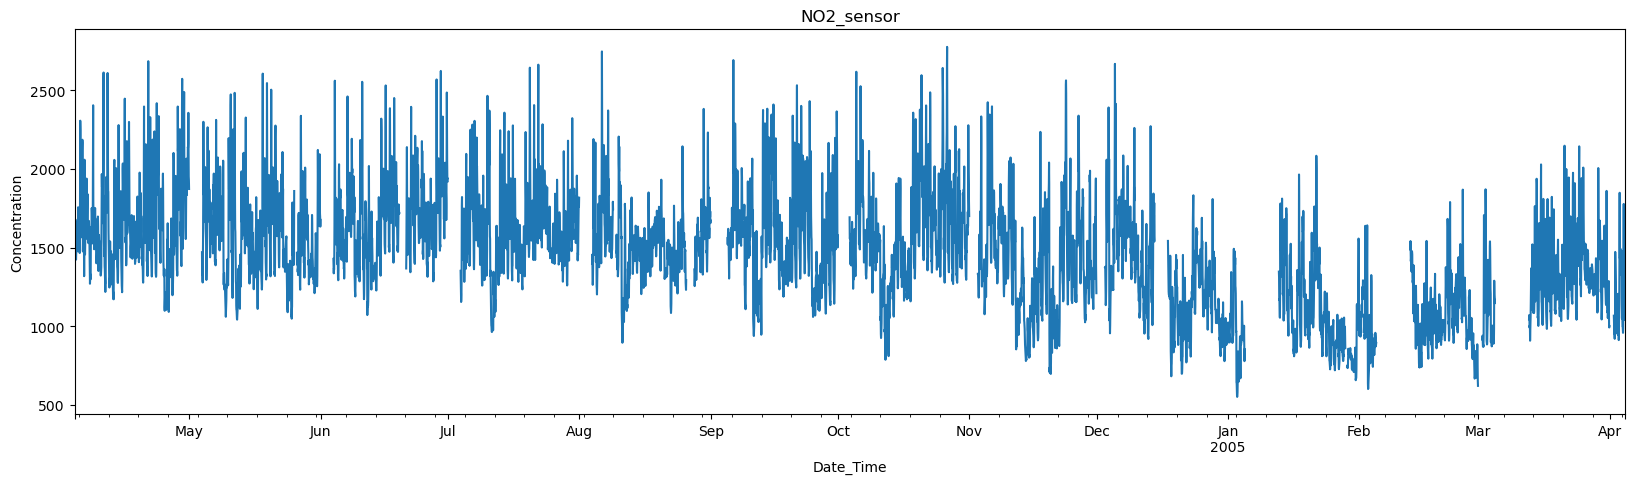

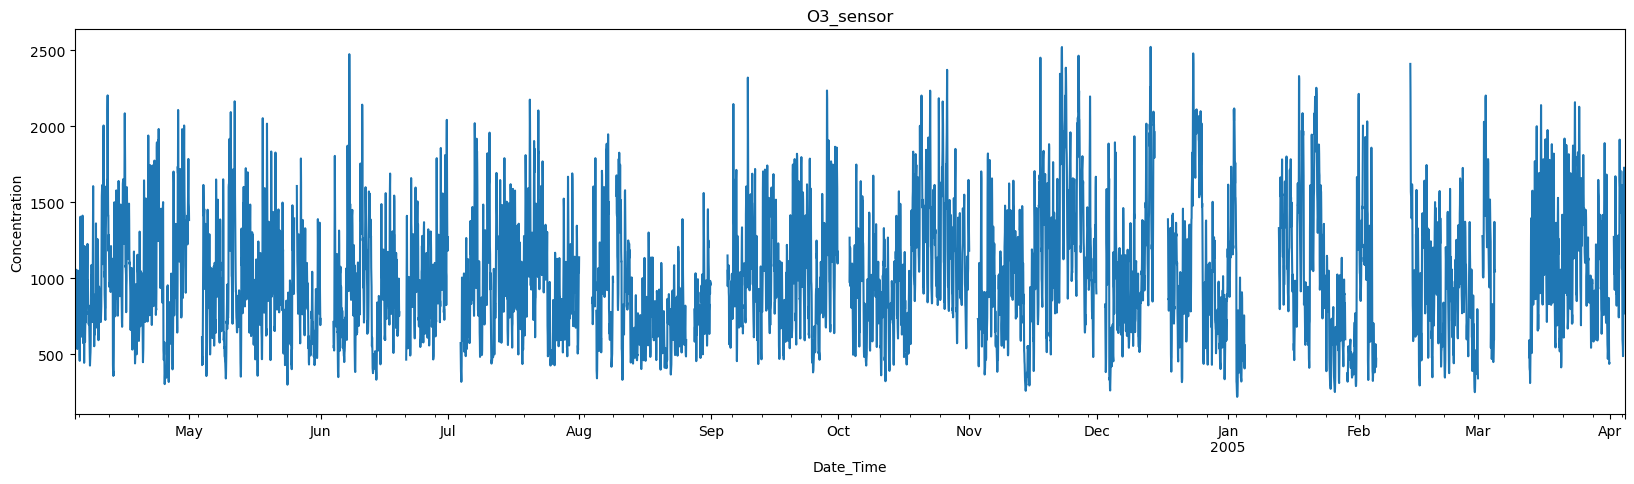

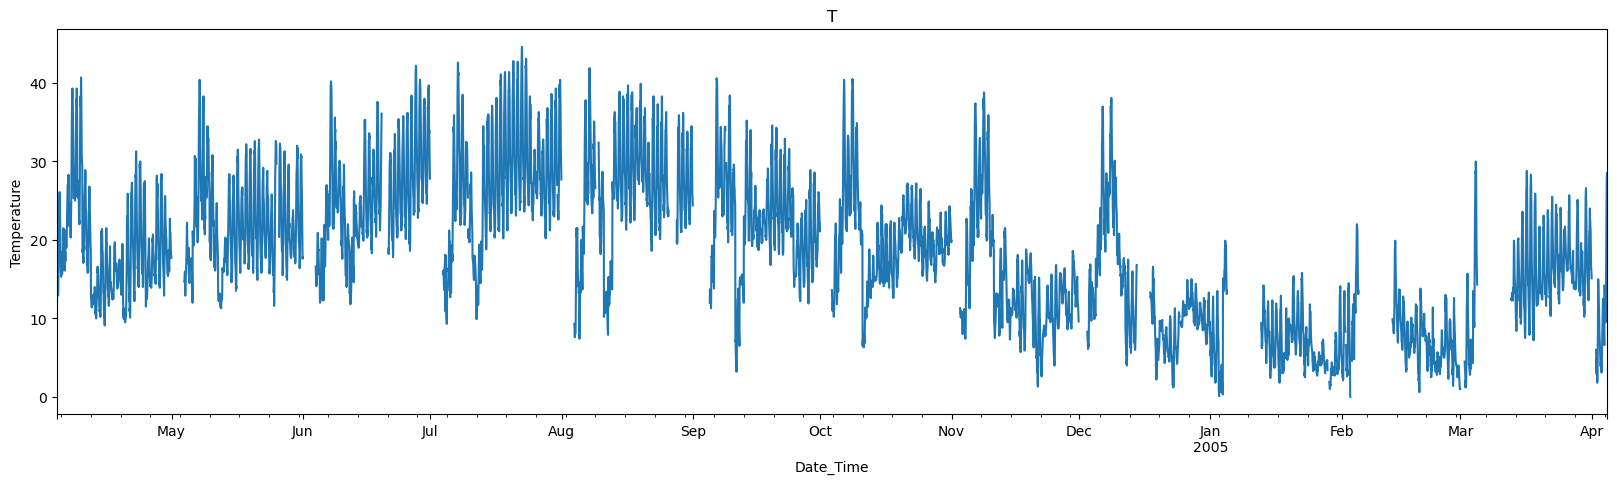

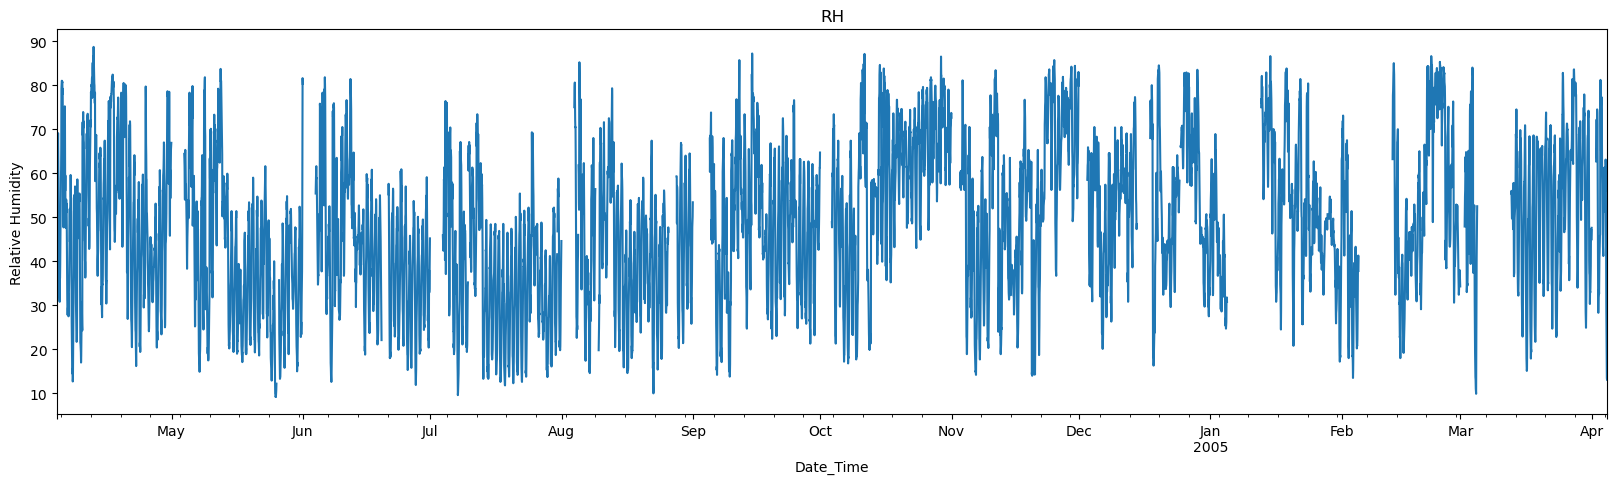

In [18]:
for var in data.columns:
    data[var].plot(figsize=(20,5))
    plt.title(var)
    ylabel=y_label.get(var)
    if ylabel:
        plt.ylabel(ylabel)
    else:
        plt.ylabel("Concentration")
    plt.show()

## Domain Knowladge
1.short term past (Rescent lags ie 1 ,2,3 hours)
2.Daily patterns (24 hours)
3.Weekend patterns
4.Yearly Patterns

In [19]:
#lets check all of these

In [22]:
#extracting the time series components
data["date"]=data.index.date
data["Time_of_Day"]=data.index.hour
data["month"]=data.index.month
data["day_of_week"]=data.index.dayofweek
data["week_of_year"]=data.index.isocalendar().week

In [23]:
y_label={
    "T":"Temperature",
    "RH":"Relative Humidity",
    "AH":"Adjusted Humidity"
}

# Seasonality Daily


Text(0, 0.5, 'Temperature')

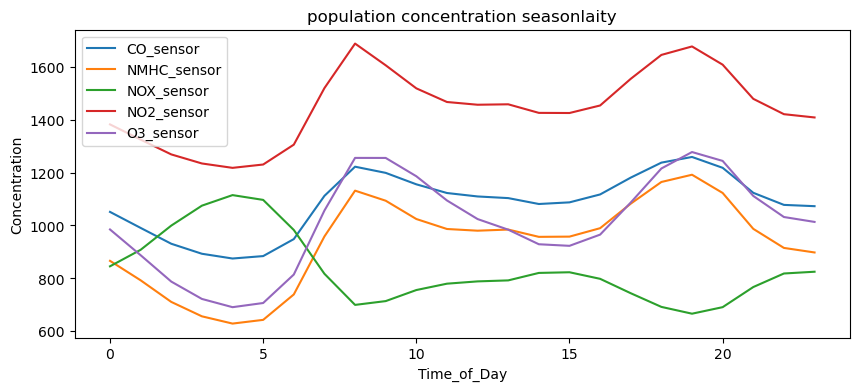

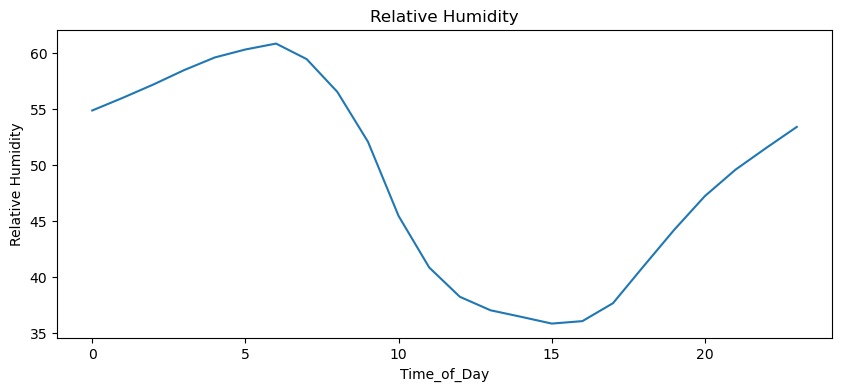

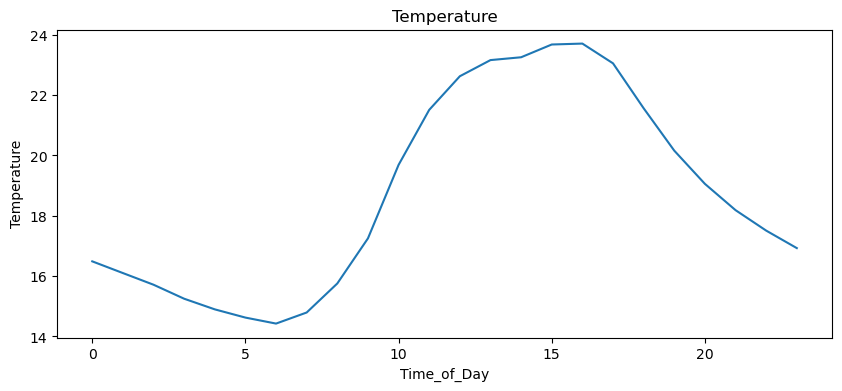

In [35]:
sensor_col=[col for col in data.columns if "sensor" in col]
fig,ax=plt.subplots(figsize=(10,4))
data.groupby("Time_of_Day")[sensor_col].mean().plot(ax=ax)
plt.title("population concentration seasonlaity")
plt.ylabel("Concentration")

fig,ax=plt.subplots(figsize=(10,4))
data.groupby("Time_of_Day")["RH"].mean().plot(ax=ax)
plt.title("Relative Humidity")
plt.ylabel("Relative Humidity")

fig,ax=plt.subplots(figsize=(10,4))
data.groupby("Time_of_Day")["T"].mean().plot(ax=ax)
plt.title("Temperature")
plt.ylabel("Temperature")



Daily patter can shift many time a year so lets plot full data sets

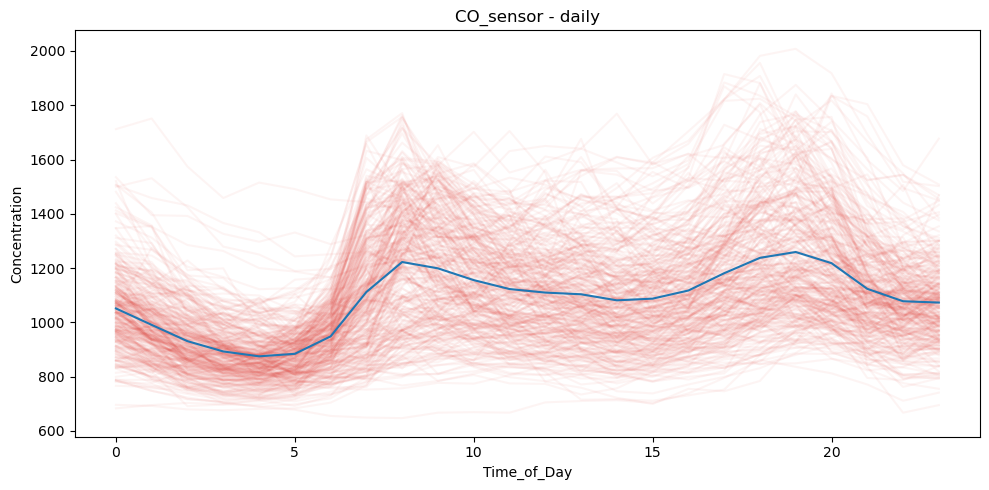

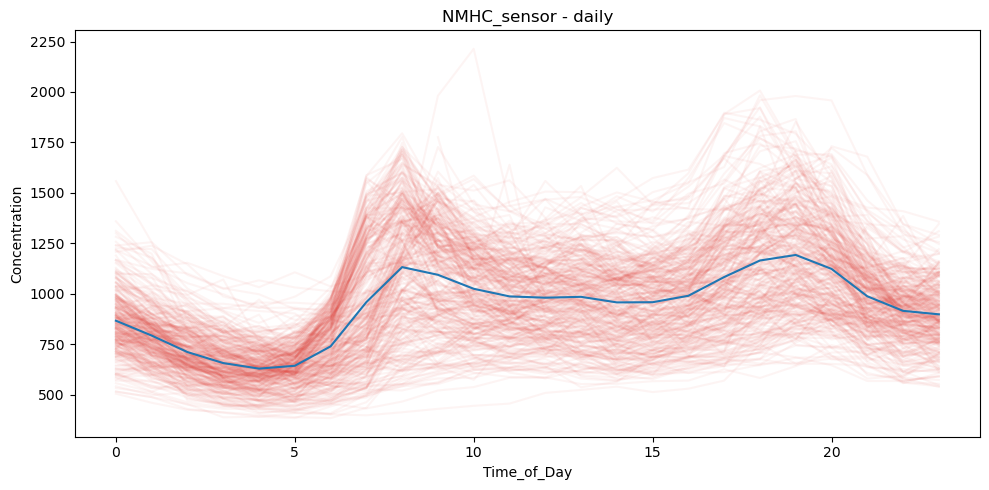

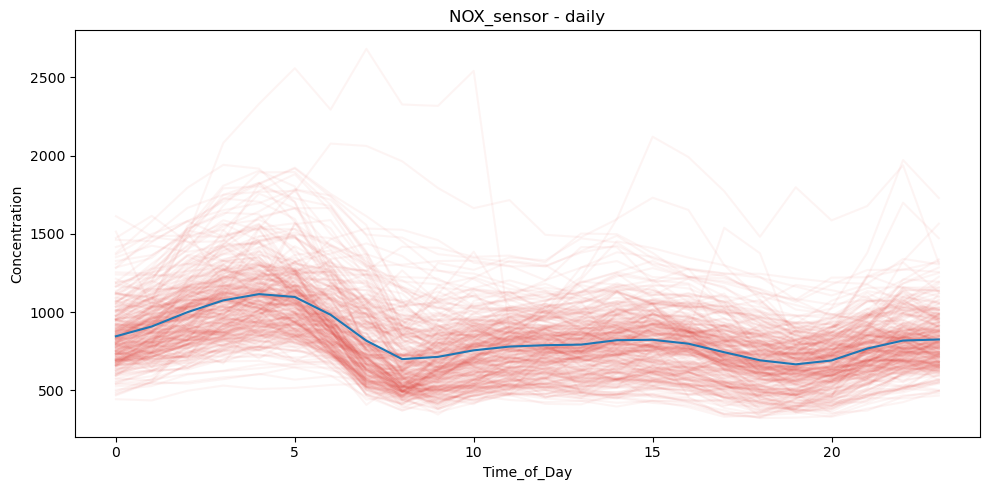

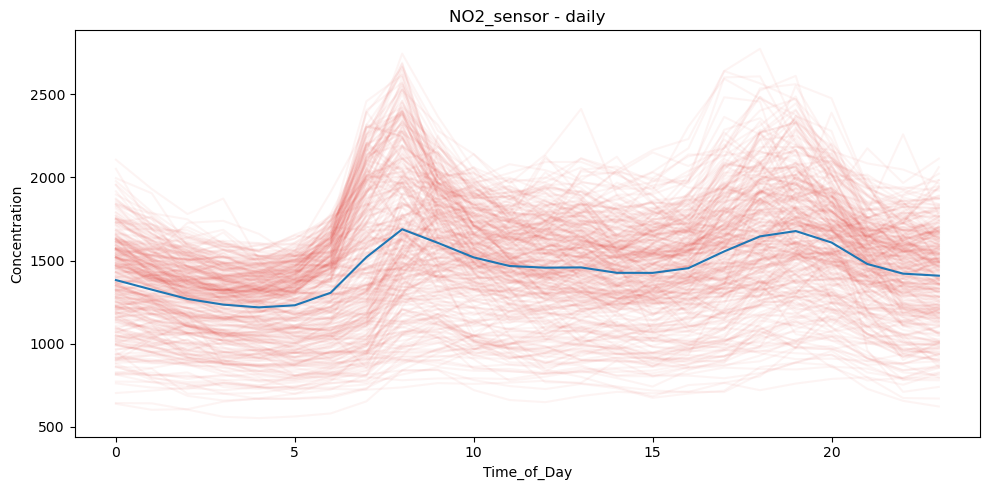

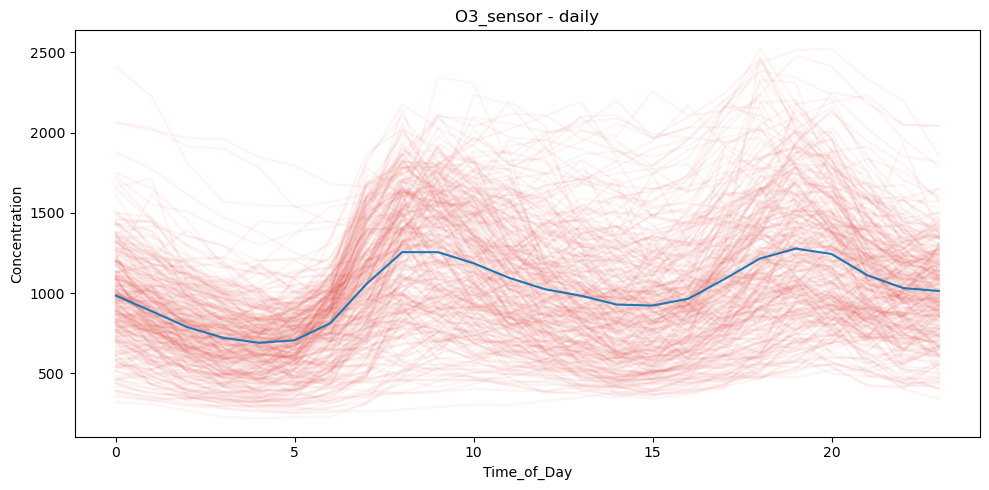

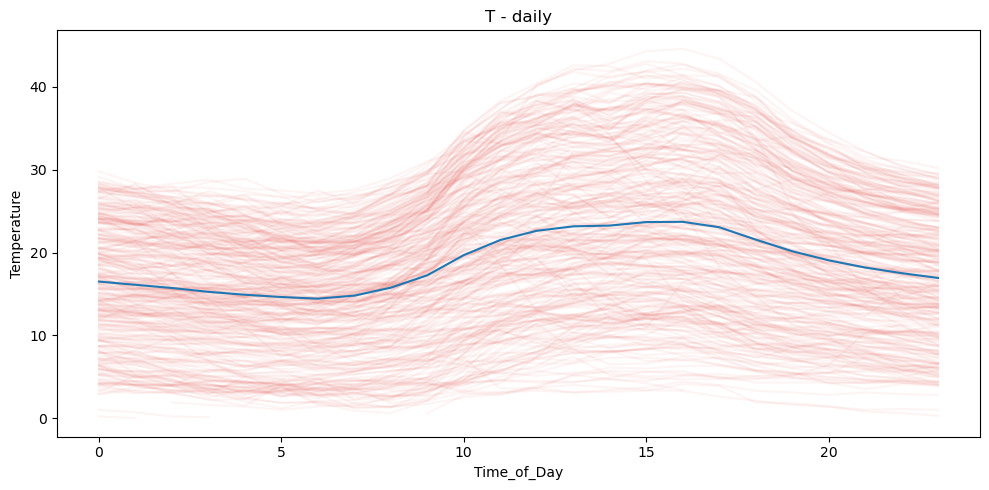

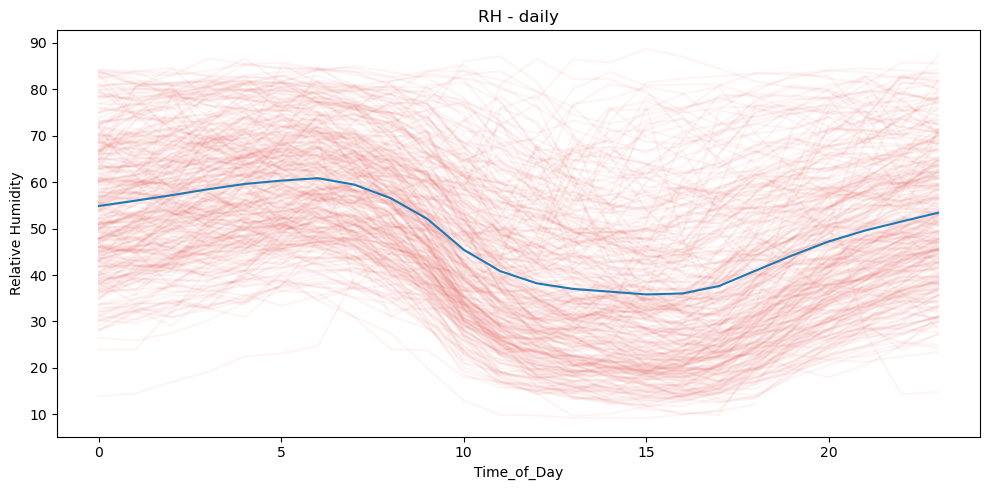

In [40]:
variables = [
    "CO_sensor",
    "NMHC_sensor",
    "NOX_sensor",
    "NO2_sensor",
    "O3_sensor",
    "T",
    "RH",
]
cmap = sns.color_palette("Reds", n_colors=5)
for var in variables:
    fig,ax=plt.subplots(figsize=[10,5])
    (
        data.pivot(index=["Time_of_Day"],columns=["date"])[var].plot
        (legend=False,alpha=0.05,color=cmap[3], ax=ax)
    )
    (data.groupby("Time_of_Day").mean(numeric_only=True)[var].plot(ax=ax))

    ax.set_title(f"{var} - daily")

    ylabel = y_label.get(var)
    if ylabel:
        plt.ylabel(ylabel)
    else:
        plt.ylabel("Concentration")

    plt.tight_layout()

## weekly seasonality

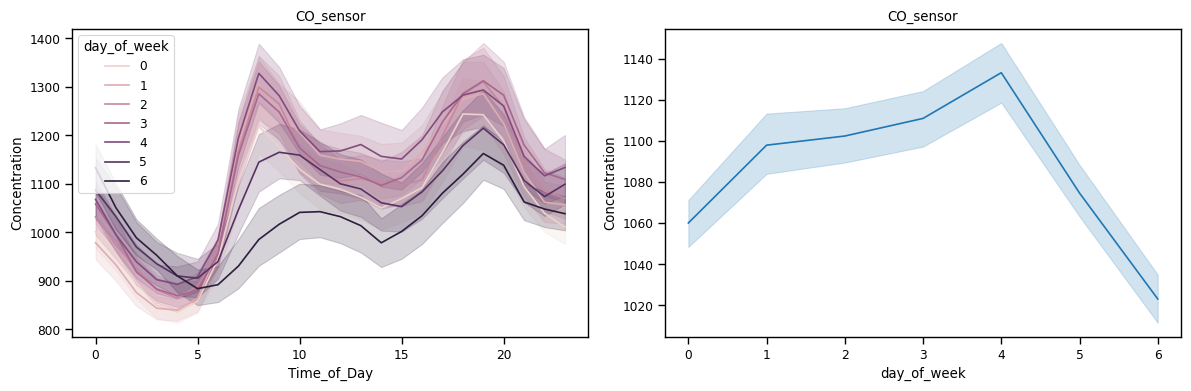

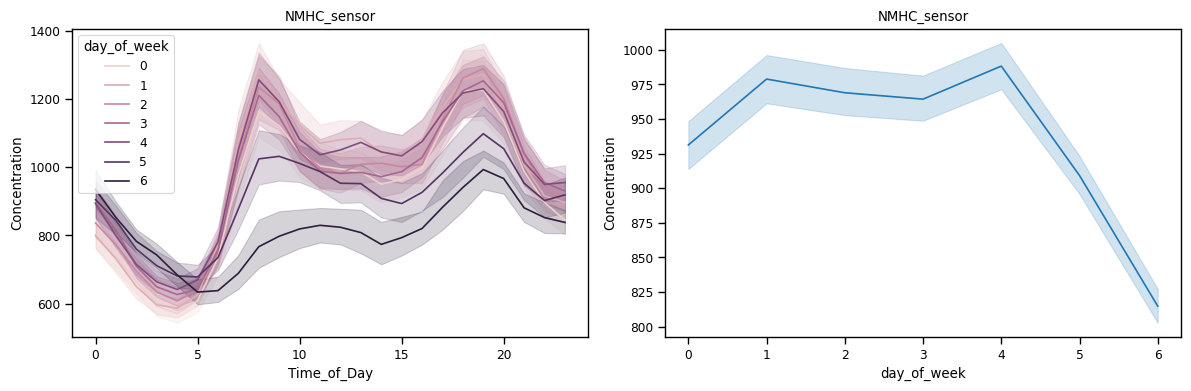

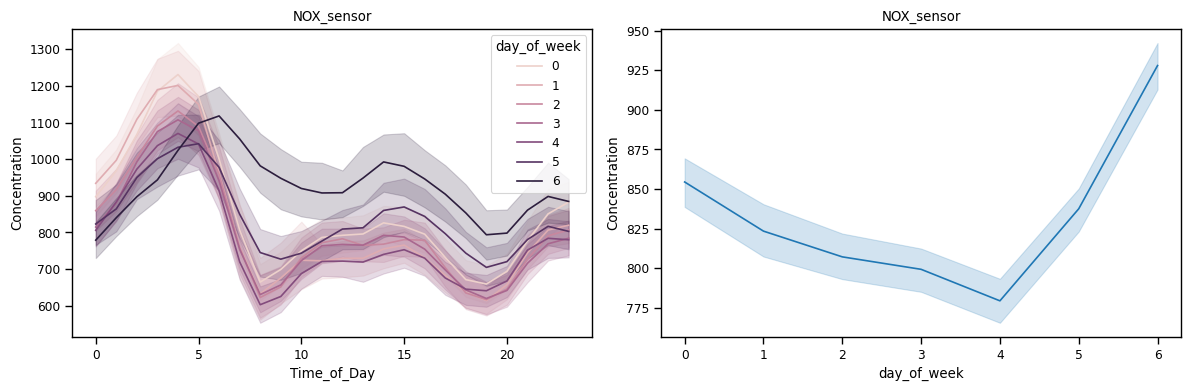

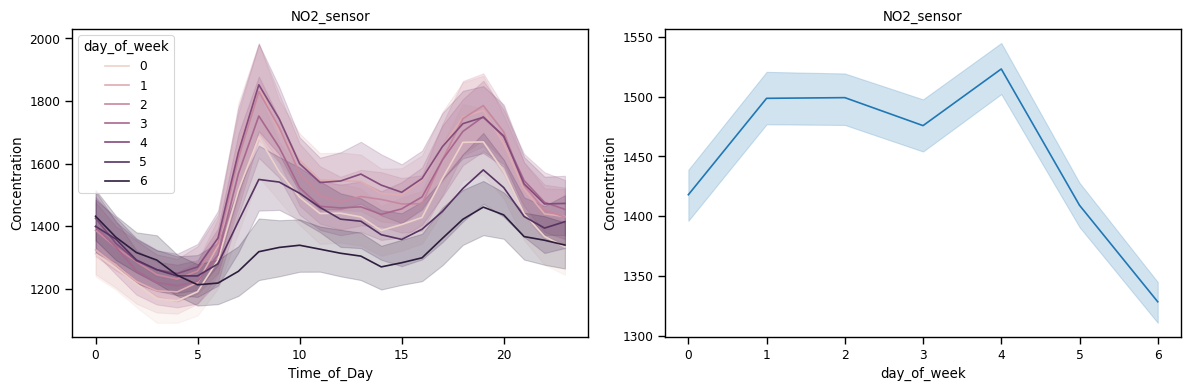

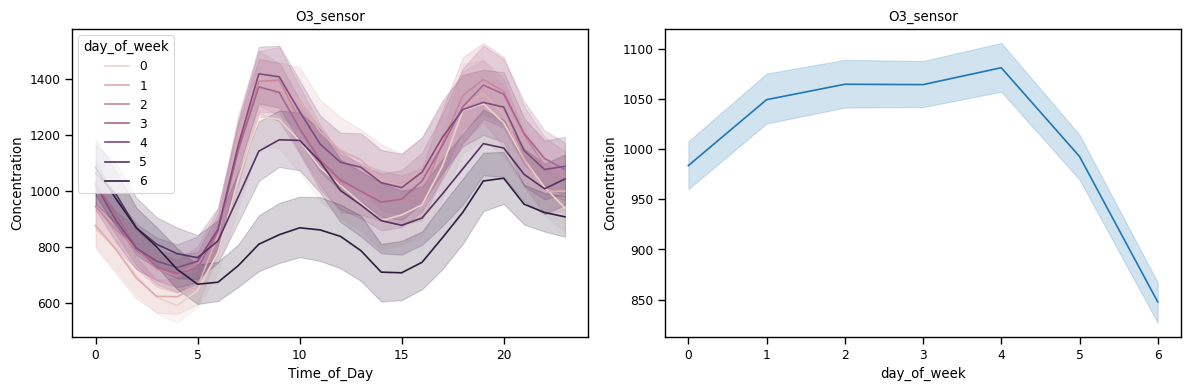

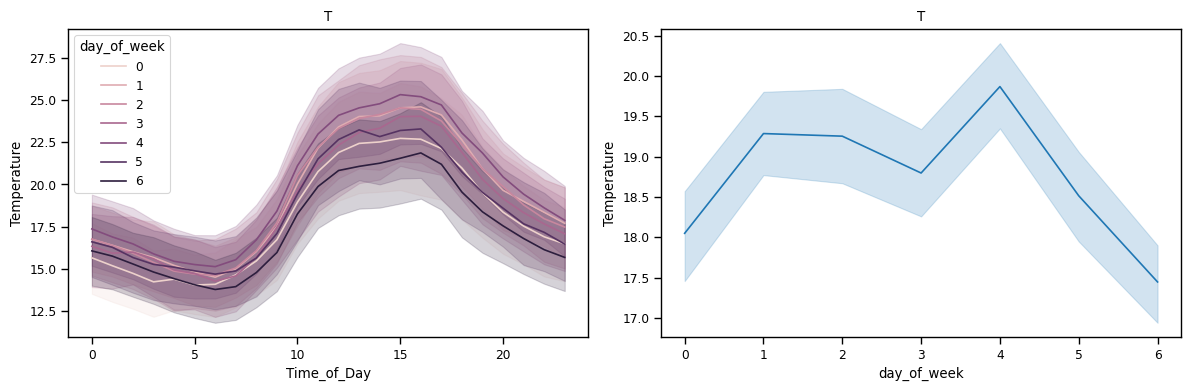

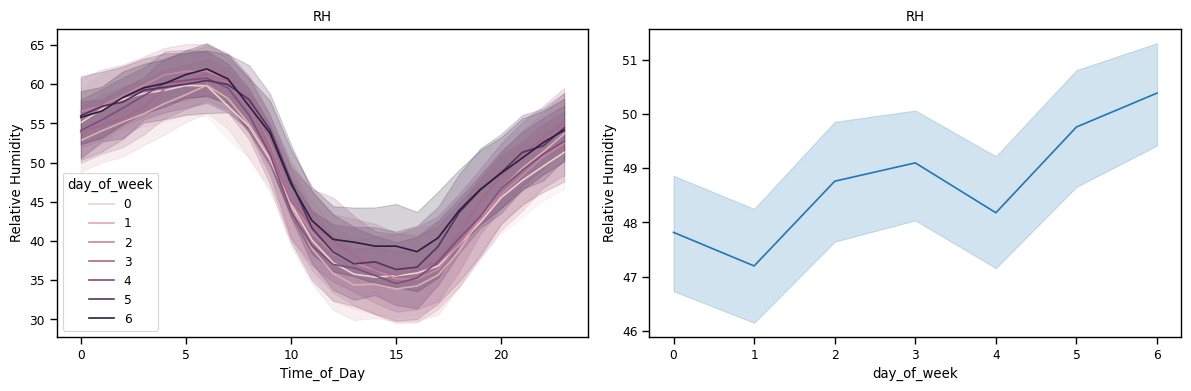

In [48]:
pd.plotting.register_matplotlib_converters()
with sns.plotting_context("paper"):
    for var in variables:
        fig,ax=plt.subplots(ncols=2,figsize=[12,4])
        ylabel=y_label.get(var)
        sns.lineplot(data=data,y=var,x="Time_of_Day",hue="day_of_week",ax=ax[0])
        if ylabel:
            ax[0].set_ylabel(ylabel)
        else:
            ax[0].set_ylabel("Concentration")
        ax[0].set_title(var)
        
        sns.lineplot(data=data,y=var,x="day_of_week",ax=ax[1])
        if ylabel:
            ax[1].set_ylabel(ylabel)
        else:
            ax[1].set_ylabel("Concentration")
        ax[1].set_title(var)
        
        plt.tight_layout()
    

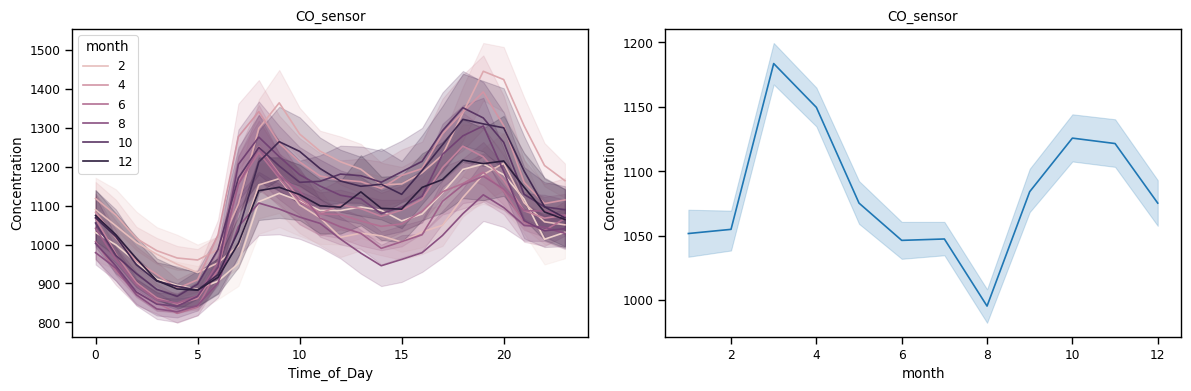

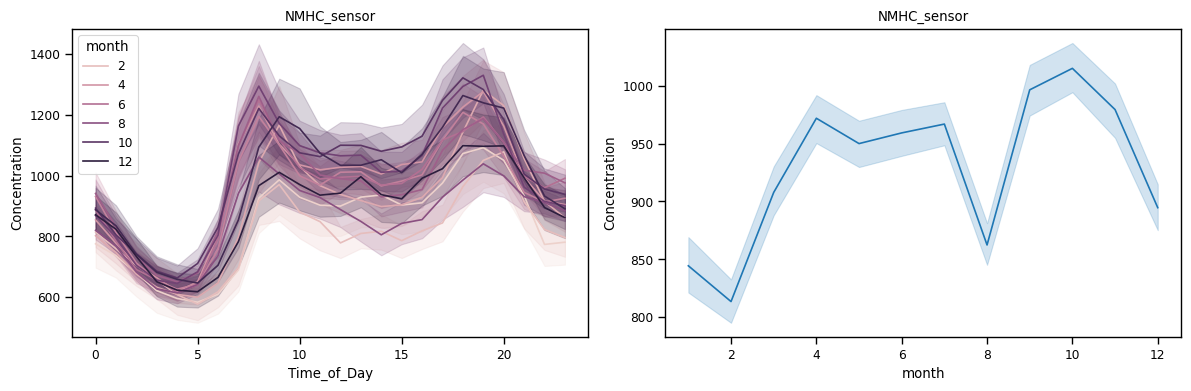

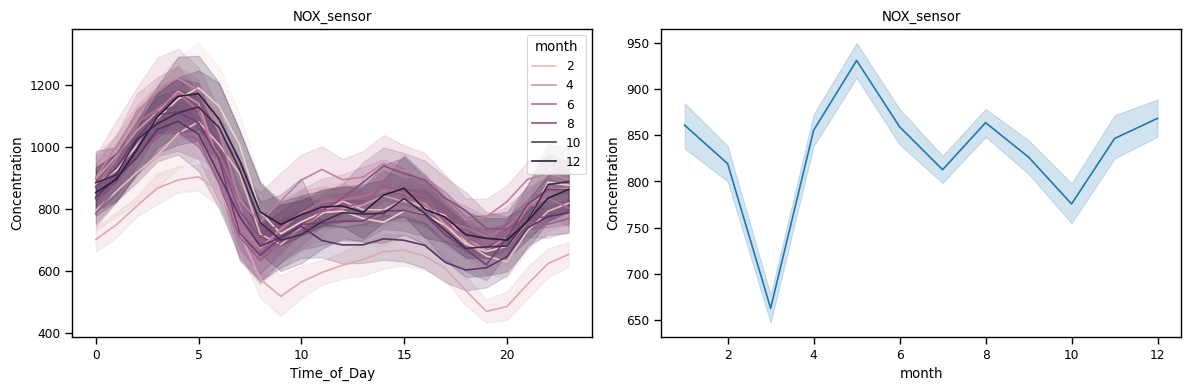

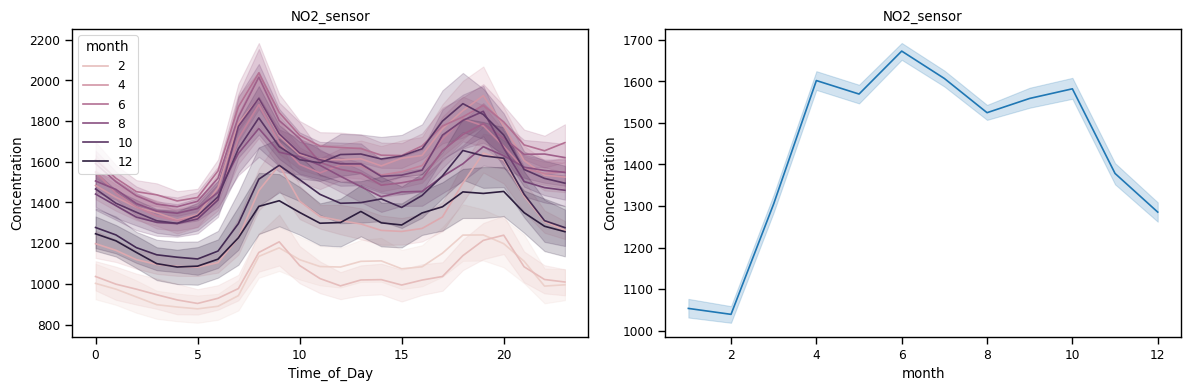

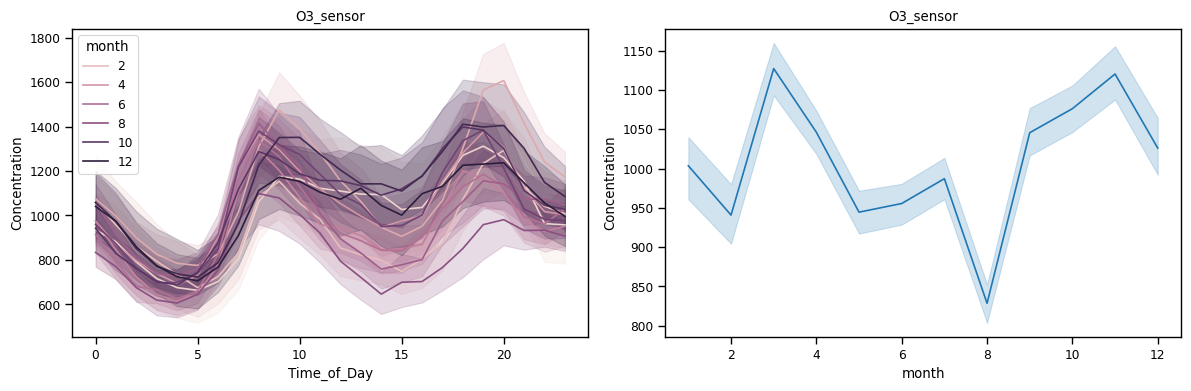

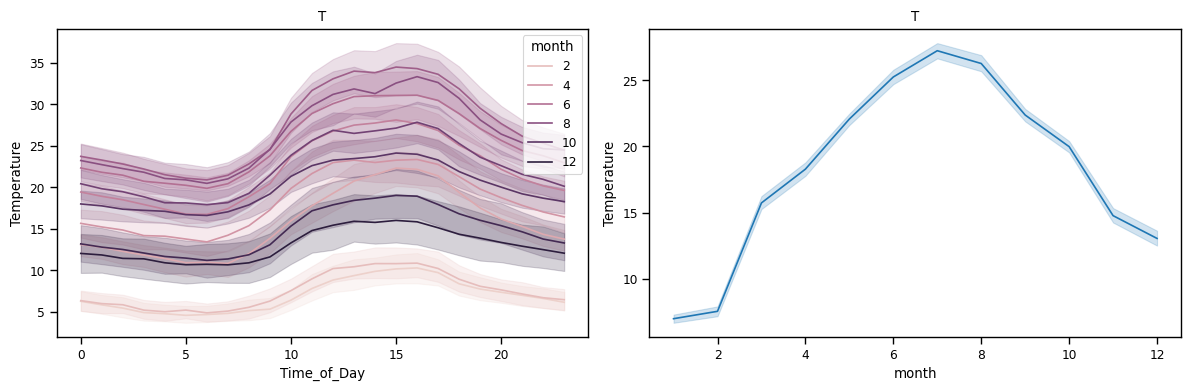

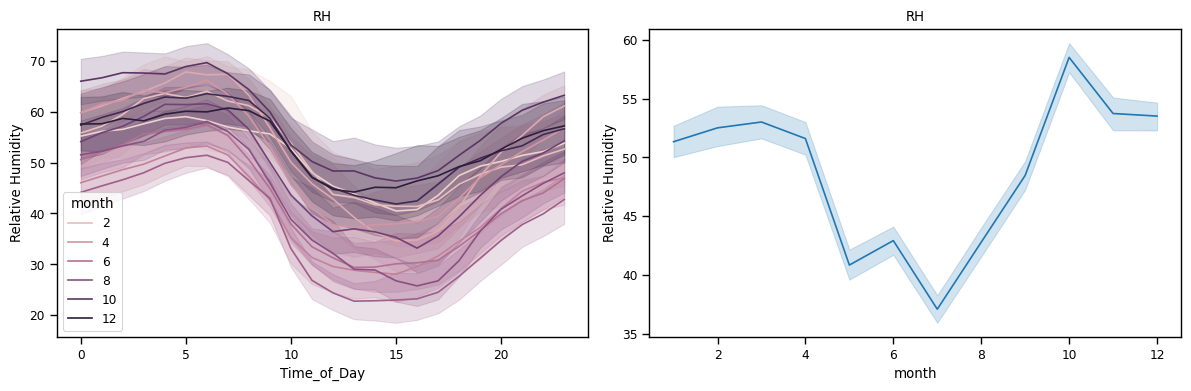

In [49]:
with sns.plotting_context("paper"):
    for var in variables:
        fig,ax=plt.subplots(ncols=2,figsize=[12,4])
        ylabel=y_label.get(var)
        sns.lineplot(data=data,y=var,x="Time_of_Day",hue="month",ax=ax[0])
        if ylabel:
            ax[0].set_ylabel(ylabel)
        else:
            ax[0].set_ylabel("Concentration")
        ax[0].set_title(var)
        
        sns.lineplot(data=data,y=var,x="month",ax=ax[1])
        if ylabel:
            ax[1].set_ylabel(ylabel)
        else:
            ax[1].set_ylabel("Concentration")
        ax[1].set_title(var)
        
        plt.tight_layout()
    